In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
session_df = pd.read_csv('task/SessionData-all.csv')
session_df.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


In [3]:
student_data_df = pd.read_csv('task/student_data.csv')
student_data_df.head()

/home/sofialanetskaya/Git/bbdc24-mlbananas/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
skeleton_df = pd.read_csv('task/student_skeleton.csv')
skeleton_df.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


<AxesSubplot:xlabel='affect'>

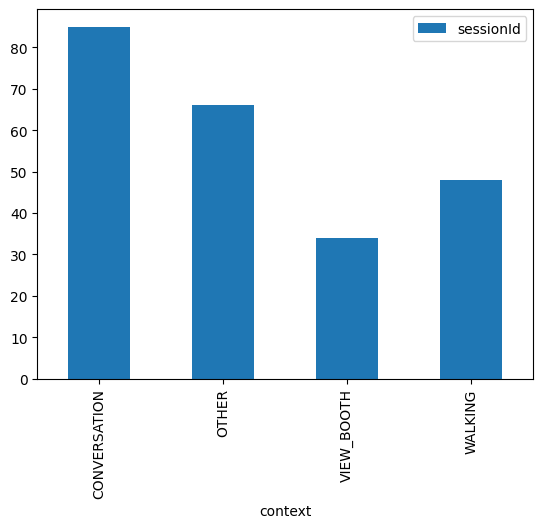

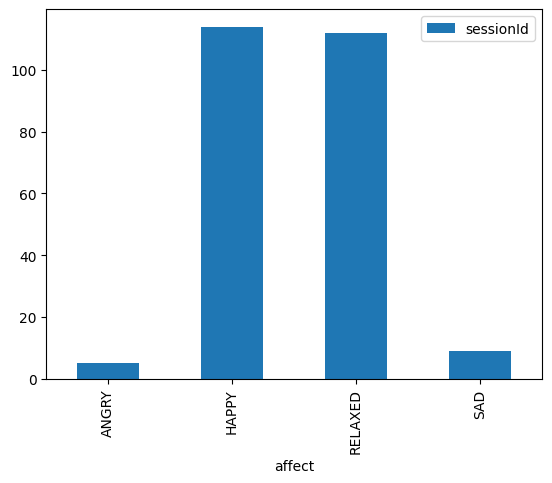

In [46]:
student_data_df[(student_data_df.affect.notna())|(student_data_df.context.notna())][["sessionId","context"]].groupby("context").count().plot.bar()
student_data_df[(student_data_df.affect.notna())|(student_data_df.context.notna())][["sessionId","affect"]].groupby("affect").count().plot.bar()

In [20]:
predictions = skeleton_df[skeleton_df.sessionId==1]

In [65]:
merged_df = pd.merge(left=student_data_df, right=session_df, left_on="sessionId", right_on="id")

In [58]:
missing_id = [5,12,13,47,52,59]

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

In [124]:
cols = ["sessionId", "timestamp", "gender", "age", "context", "affect", "watchId", "duration", "fairNumber"]
labeled_df = merged_df[(merged_df.affect.notna())|(merged_df.context.notna())][cols]

In [134]:
labeled_df.groupby(["fairNumber","affect","age","gender"])["sessionId", "duration"].count()

/tmp/ipykernel_5255/18040093.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  labeled_df.groupby(["fairNumber","affect","age","gender"])["sessionId", "duration"].count()


sessionId  duration
fairNumber affect  age   gender                     
1          ANGRY   18-25 male            1         1
           HAPPY   18-25 female          1         1
                         male            9         9
                   26-30 male            2         2
           RELAXED 18-25 female          3         3
                         male           13        13
                   26-30 male            1         1
           SAD     18-25 male            1         1
2          ANGRY   18-25 female          1         1
           HAPPY   18-25 female          6         6
                   31-40 female          1         1
           RELAXED 18-25 female         10        10
                         male            2         2
                   31-40 female          4         4
           SAD     31-40 female          2         2
3          HAPPY   18-25 male            5         5
                   26-30 female          4         4
                         male            7         7
                   31-40 female          2         2
                         male            2         2
           RELAXED 18-25 female         11        11
                         male            3         3
                   26-30 female          4         4
                         male            6         6
                   31-40 female          7         7
                         male            3         3
           SAD     26-30 female          1         1
                         male            1         1
4          ANGRY   18-25 female          1         1
                         male            2         2
           HAPPY   18-25 female         30        30
                         male           22        22
                   26-30 female         17        17
                         male            6         6
           RELAXED 18-25 female         12        12
                         male           20        20
                   26-30 female          3         3
                         male           10        10
           SAD     18-25 female          2         2
                         male            2         2

In [123]:
merged_df.columns

Index(['sessionId', 'timestamp', 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi',
       'hrStatus', 'ibiStatus', 'notification', 'engagement', 'affect',
       'context', 'id', 'duration', 'watchId', 'age', 'gender', 'fairNumber'],
      dtype='object')

In [140]:
labeled_df["timedelta"]=pd.to_timedelta(labeled_df.timestamp, unit="ms")

In [145]:
skeleton_df["timedelta"]=pd.to_timedelta(skeleton_df.timestamp, unit="ms")

In [147]:
labeled_df

,sessionId,timestamp,gender,age,context,affect,watchId,duration,fairNumber,timedelta
13023,1,503234,female,18-25,NaN,RELAXED,0Q3V,8021351,1,0 days 00:08:23.234000
13173,1,509006,female,18-25,WALKING,NaN,0Q3V,8021351,1,0 days 00:08:29.006000
69440,1,2689934,female,18-25,NaN,RELAXED,0Q3V,8021351,1,0 days 00:44:49.934000
69715,1,2700529,female,18-25,CONVERSATION,NaN,0Q3V,8021351,1,0 days 00:45:00.529000
97876,1,3788764,female,18-25,NaN,RELAXED,0Q3V,8021351,1,0 days 01:03:08.764000
...,...,...,...,...,...,...,...,...,...,...
8008986,58,2595091,female,18-25,NaN,HAPPY,PVQB,6662013,4,0 days 00:43:15.091000
8009183,58,2602657,female,18-25,CONVERSATION,NaN,PVQB,6662013,4,0 days 00:43:22.657000
8061087,58,4610020,female,18-25,NaN,HAPPY,PVQB,6662013,4,0 days 01:16:50.020000
8101818,58,6185055,female,18-25,NaN,HAPPY,PVQB,6662013,4,0 days 01:43:05.055000


In [154]:
skeleton_df = skeleton_df.rename(columns={"affect":"affect_tba", "context":"context_tba"})

In [180]:
skeleton_df

,sessionId,timestamp,affect_tba,context_tba,timedelta
0,1,1652042,True,False,0 days 00:27:32.042000
1,1,1658301,False,True,0 days 00:27:38.301000
2,1,5914412,True,False,0 days 01:38:34.412000
3,1,5921368,False,True,0 days 01:38:41.368000
4,2,629724,True,False,0 days 00:10:29.724000
...,...,...,...,...,...
188,58,3179345,False,True,0 days 00:52:59.345000
189,58,4945652,True,False,0 days 01:22:25.652000
190,58,4951621,False,True,0 days 01:22:31.621000
191,58,5674479,True,False,0 days 01:34:34.479000


In [179]:
meta_cols = ['gender','age','watchId','duration','fairNumber']

In [182]:
labeled_and_predict_df = pd.merge(left=labeled_df, right=skeleton_df, how="outer").sort_values(["sessionId", "timestamp"]).reset_index(drop=True)

In [160]:
labeled_and_predict_df.to_csv("task/labeled_and_skeleton.csv")

In [183]:
labeled_and_predict_df[meta_cols] = labeled_and_predict_df.groupby("sessionId")[meta_cols].ffill()

In [185]:
labeled_and_predict_df[labeled_and_predict_df.sessionId==25]

,sessionId,timestamp,gender,age,context,affect,watchId,duration,fairNumber,timedelta,affect_tba,context_tba
185,25,394108,female,18-25,NaN,RELAXED,0QVM,3745019.0,3.0,0 days 00:06:34.108000,NaN,NaN
186,25,412833,female,18-25,OTHER,NaN,0QVM,3745019.0,3.0,0 days 00:06:52.833000,NaN,NaN
187,25,980632,female,18-25,NaN,NaN,0QVM,3745019.0,3.0,0 days 00:16:20.632000,True,False
188,25,997502,female,18-25,NaN,NaN,0QVM,3745019.0,3.0,0 days 00:16:37.502000,False,True
189,25,1635299,female,18-25,NaN,RELAXED,0QVM,3745019.0,3.0,0 days 00:27:15.299000,NaN,NaN
190,25,1647457,female,18-25,OTHER,NaN,0QVM,3745019.0,3.0,0 days 00:27:27.457000,NaN,NaN
191,25,2284301,female,18-25,NaN,RELAXED,0QVM,3745019.0,3.0,0 days 00:38:04.301000,NaN,NaN
192,25,2296938,female,18-25,OTHER,NaN,0QVM,3745019.0,3.0,0 days 00:38:16.938000,NaN,NaN
193,25,2922133,female,18-25,NaN,NaN,0QVM,3745019.0,3.0,0 days 00:48:42.133000,True,False
194,25,2934638,female,18-25,NaN,NaN,0QVM,3745019.0,3.0,0 days 00:48:54.638000,False,True
